In [39]:
import argparse
from pathlib import Path
from time import sleep
from IPython.display import clear_output

import numpy as np
from keras.models import load_model

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from gand.data import data

In [40]:
DATASET_INFO = {
    'mnist': {
        'class_names': [str(i) for i in range(10)],
        'input_shape': (28, 28, 1)
    },
    'fashion_mnist': {
        'class_names': ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 
                        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'],
        'input_shape': (28, 28, 1)
    },
    'cifar10':{
        'class_names': ['airplane', 'car', 'bird', 'cat', 'deer', 
                        'dog', 'frog', 'horse', 'ship', 'truck'],
        'input_shape': (32, 32, 3)
    }
}

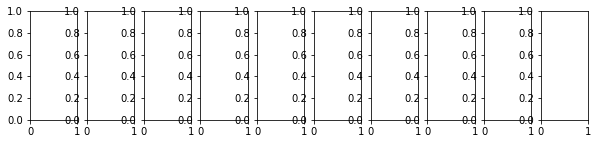

In [41]:
fig, axs = plt.subplots(1, 10, figsize=(10, 2))

def update(frame):
    print(f'[{frame}/{num_frames}]')
    g_model = load_model(f'./notebooks/models/{gan_name}/{dataset_name}/gen_model_e-{frame+1:03d}.h5')
    X, y = data.generate_fake_data(n=1, g_model=g_model)
    X = (X+1) / 2
    for i, ax in enumerate(axs.flatten()):
        ax.imshow(X[i], cmap='gray_r')
        ax.set_title(DATASET_INFO[dataset_name]['class_names'][y[i]])
        ax.axis('off')
    fig.suptitle(f'({dataset_name.upper()}) Epoch: {frame+1}', fontsize=20)
    plt.tight_layout()
    clear_output(wait=True)
clear_output(wait=True)

In [43]:
gan_name = 'cgan'
dataset_name = 'mnist'

cwd = Path.cwd()
num_frames = len(list(cwd.glob(f"**/notebooks/models/{gan_name}/{dataset_name}/*.h5")))
interval = 1
fps = 20
# fps = 1000 / (num_frames * interval)
print(f'FRAMES: {num_frames} | FPS: {fps} | INTERVAL: {interval}')
sleep(0.1)
anim = animation.FuncAnimation(fig, update, frames=num_frames, interval=interval)


filename = f"animation_{num_frames}_samples.gif"

folder = cwd / Path('reports/animations') / Path(f'{gan_name}/{dataset_name}')
folder.mkdir(parents=True, exist_ok=True)

writer = animation.FFMpegWriter(fps=fps)
print(folder.joinpath(filename))
anim.save(folder.joinpath(filename), writer=writer)

<Figure size 432x288 with 0 Axes>